# 0. Load Data

In [1]:

import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence
import pickle
import pandas as pd
from scipy.stats import gaussian_kde
from function import *
from function import PATHS


df=pd.read_csv(PATHS['data_prediction_net_benefit'])
df2=pd.read_csv(PATHS['data_strategies'])
# Load the point density data from pickle
with open(PATHS['point_density'], 'rb') as f:
    density_data = pickle.load(f)

xy_coords = density_data['coordinates'] 
z = density_data['density']


gogogo


: 

# 1. Emission Map

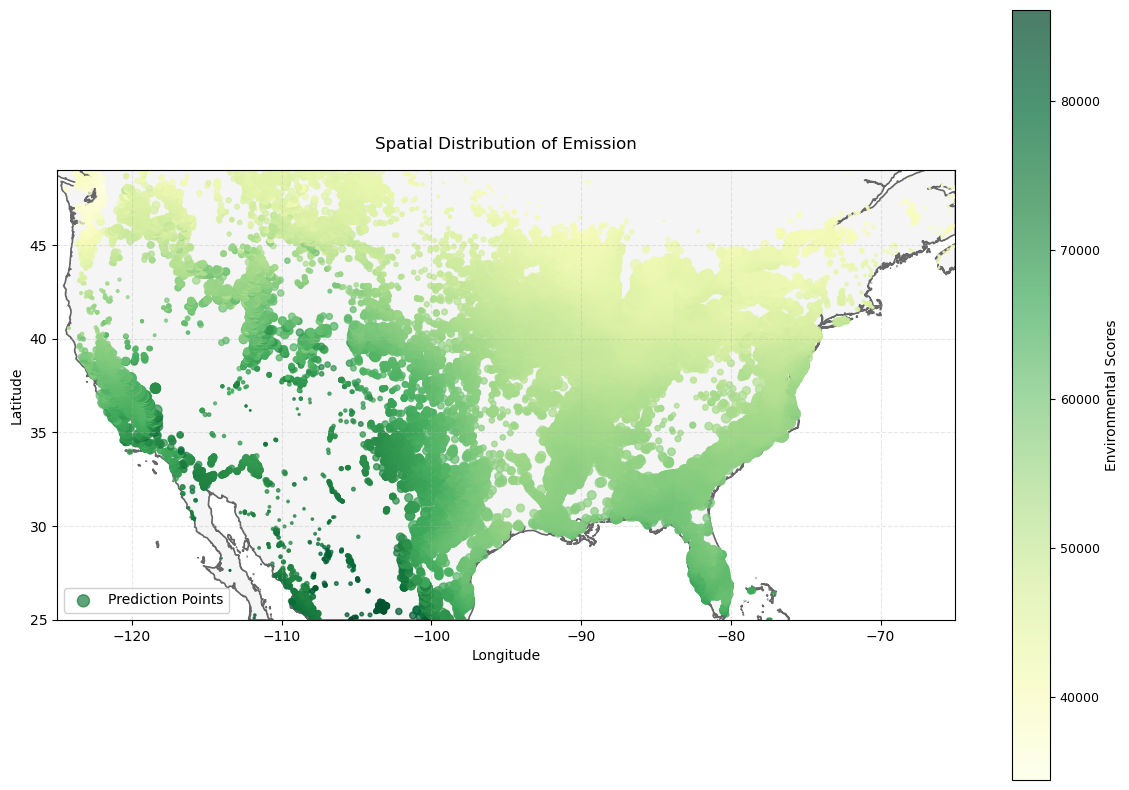

In [4]:
import geopandas as gpd
from function import * 
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde

# Create figure and set size
fig, ax = plt.subplots(figsize=(12,8))

# Define USA mainland bounds
usa_bounds_main = {
        'lon_min': -125,  # Westernmost point (Washington state)
        'lon_max': -65,   # Easternmost point (Maine)
        'lat_min': 25,    # Southernmost point (Florida)
        'lat_max': 49     # Northernmost point (Canada border)
    }
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)

# Set plot bounds to USA mainland
ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])

# Draw USA mainland base map with more prominent borders
us_main.plot(ax=ax, color='#f5f5f5', edgecolor='#666666', linewidth=1.2)

# Create YlGn colormap for prediction points
pred_colors = plt.cm.YlGn(np.linspace(0, 1, 256))
pred_cmap = ListedColormap(pred_colors)

# Create gradient colormap for training points (orange)
train_colors = np.array(['#fff2e6', '#ffd9b3', '#ffbf80', '#ffa64d', '#ff8c1a'])  # Light to dark orange
rgb_train_colors = np.linspace(plt.matplotlib.colors.to_rgb(train_colors[0]), 
                        plt.matplotlib.colors.to_rgb(train_colors[-1]), 
                        256)
train_cmap = ListedColormap(rgb_train_colors)



# Plot prediction points with size based on density
scatter = ax.scatter(df['lon'], df['lat'],
                    c=df['carbon_emission (t)/yr'],
                    s=150 * z/z.max(),  # Increased size multiplier from 100 to 150
                    cmap=pred_cmap,
                    alpha=0.7,
                    label='Prediction Points')

# # Plot training points with smaller size
# train_scatter = ax.scatter(us_df_embedding_fill['lon'], us_df_embedding_fill['lat'],
#                           alpha=0.4, s=8, c='orange',  # Reduced size from 15 to 8
#                           label='Training Points')

# Add colorbar
cbar = plt.colorbar(scatter, label='Environmental Scores', ax=ax)
cbar.ax.tick_params(labelsize=9)

# Set chart style
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.set_title('Spatial Distribution of Emission', 
             fontsize=12, pad=15)
ax.legend(frameon=True, facecolor='white', framealpha=0.9)
ax.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# 2. Opportunity Loss Map

In [ ]:
df=pd.read_csv(PATHS['data_prediction_net_benefit'])

### 2.1 KDE

  0%|          | 0/9 [00:00<?, ?it/s]

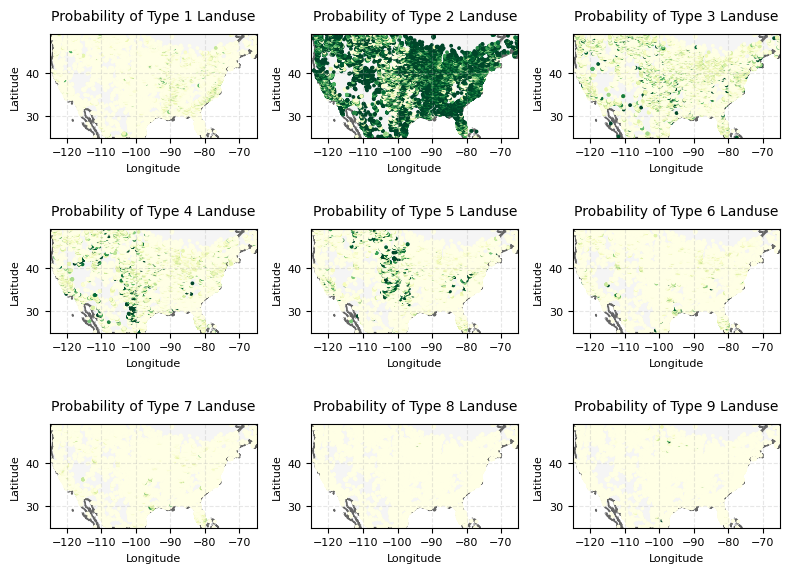

In [10]:
import geopandas as gpd
from function import * 
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from function import PATHS
from tqdm.auto import tqdm
df=pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Create figure with GridSpec
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(3, 3)

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,  # Westernmost point (Washington state)
    'lon_max': -65,   # Easternmost point (Maine)
    'lat_min': 25,    # Southernmost point (Florida)
    'lat_max': 49     # Northernmost point (Canada border)
}
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)

# Create YlGn colormap for prediction points
pred_colors = plt.cm.YlGn(np.linspace(0, 1, 256))
pred_cmap = ListedColormap(pred_colors)

# Plot each weighted density in a subplot
for i in tqdm(range(9)):
    row = i // 3
    col = i % 3
    weight_num = i + 1
    
    ax = fig.add_subplot(gs[row, col])
    
    # Set plot bounds to USA mainland
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])
    
    # Draw USA mainland base map
    us_main.plot(ax=ax, color='#f5f5f5', edgecolor='#666666', linewidth=1.2)
    
    # Plot prediction points
    scatter = ax.scatter(df['lon'], df['lat'],
                        c=df[f'weighted_density_{weight_num}'],
                        s=3,  # Smaller point size for subplots
                        cmap=pred_cmap)
    
    # # Add colorbar
    # plt.colorbar(scatter, ax=ax, label=f'Density {weight_num}')
    
    # Set chart style
    ax.set_xlabel('Longitude', fontsize=8)
    ax.set_ylabel('Latitude', fontsize=8)
    ax.set_title(f'Probability of Type {weight_num} Landuse', 
                 fontsize=10, pad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(labelsize=8)

# Adjust layout
plt.tight_layout()
plt.show()

### 2.2 County_Plane

Creating spatial index...
Calculating county densities for Ecological type...


  0%|          | 0/3233 [00:00<?, ?it/s]

Calculating county densities for Agricultural type...


  0%|          | 0/3233 [00:00<?, ?it/s]

Calculating county densities for Others type...


  0%|          | 0/3233 [00:00<?, ?it/s]

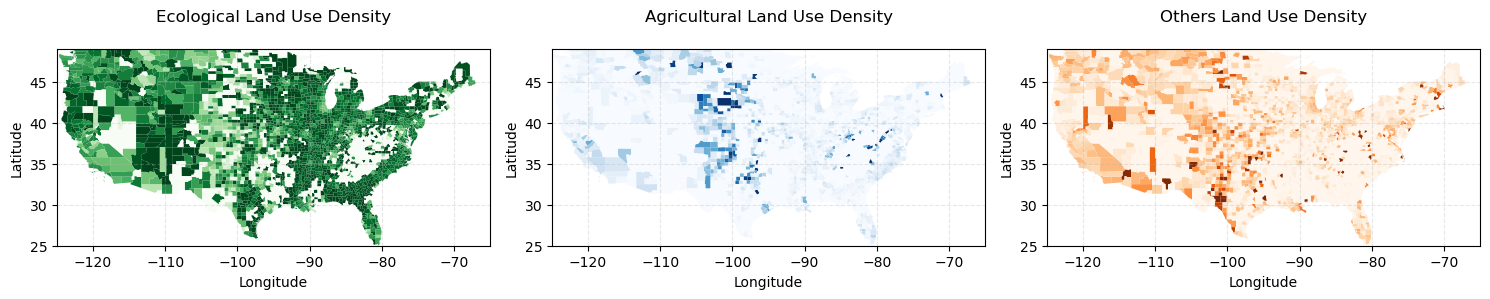

In [52]:
import geopandas as gpd
from function import * 
from shapely.geometry import box, Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from function import PATHS
from tqdm.auto import tqdm
from rtree import index
import matplotlib.gridspec as gridspec

# Read data
df = pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Combine land use types
df['weighted_density_type1'] = df['weighted_density_2'] + df['weighted_density_6']  # Ecological
df['weighted_density_type2'] = df['weighted_density_1'] + df['weighted_density_5'] + df['weighted_density_7']  # Agricultural
df['weighted_density_type3'] = df['weighted_density_3'] + df['weighted_density_4'] + df['weighted_density_8'] + df['weighted_density_9']  # Others

us_county = gpd.read_file(PATHS['us_county'])

# Create figure with GridSpec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(1, 3, figure=fig)

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 25,
    'lat_max': 49
}

# Create spatial index
print("Creating spatial index...")
spatial_index = index.Index()
for i, point in enumerate(zip(df['lon'], df['lat'])):
    spatial_index.insert(i, (point[0], point[1], point[0], point[1]))

# Plot for each combined type
type_names = ['Ecological', 'Agricultural', 'Others']
cmaps = ['Greens', 'Blues', 'Oranges']  # Different color schemes for each type

for idx in range(3):
    print(f"Calculating county densities for {type_names[idx]} type...")
    county_densities = []
    
    for _, county in tqdm(us_county.iterrows(), total=len(us_county)):
        bounds = county.geometry.bounds
        possible_points = list(spatial_index.intersection(bounds))
        
        points_in_county = []
        for point_idx in possible_points:
            point = Point(df.iloc[point_idx]['lon'], df.iloc[point_idx]['lat'])
            if county.geometry.contains(point):
                points_in_county.append(df.iloc[point_idx][f'weighted_density_type{idx+1}'])
        
        mean_density = np.mean(points_in_county) if points_in_county else 0
        county_densities.append(mean_density)

    us_county[f'mean_density_type{idx+1}'] = county_densities
    
    # Create subplot using GridSpec
    ax = fig.add_subplot(gs[0, idx])
    
    # Plot choropleth map without colorbar
    us_county.plot(column=f'mean_density_type{idx+1}', 
                   ax=ax,
                   legend=False,
                   cmap=cmaps[idx],  # Use different color scheme for each type
                   missing_kwds={'color': 'lightgrey'})

    # Set bounds
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])

    # Style
    ax.set_title(f'{type_names[idx]} Land Use Density', pad=20)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Choropleth Map

Creating spatial index...
Calculating county densities for Ecological type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

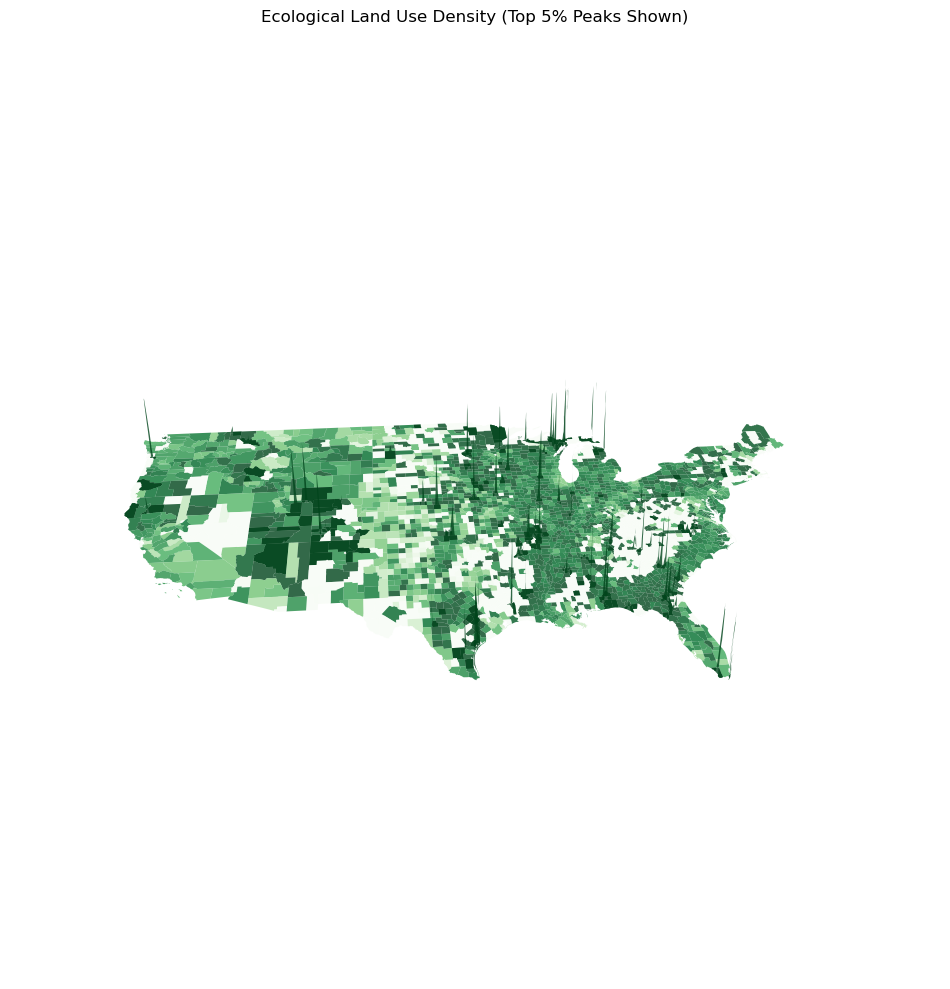

Calculating county densities for Agricultural type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

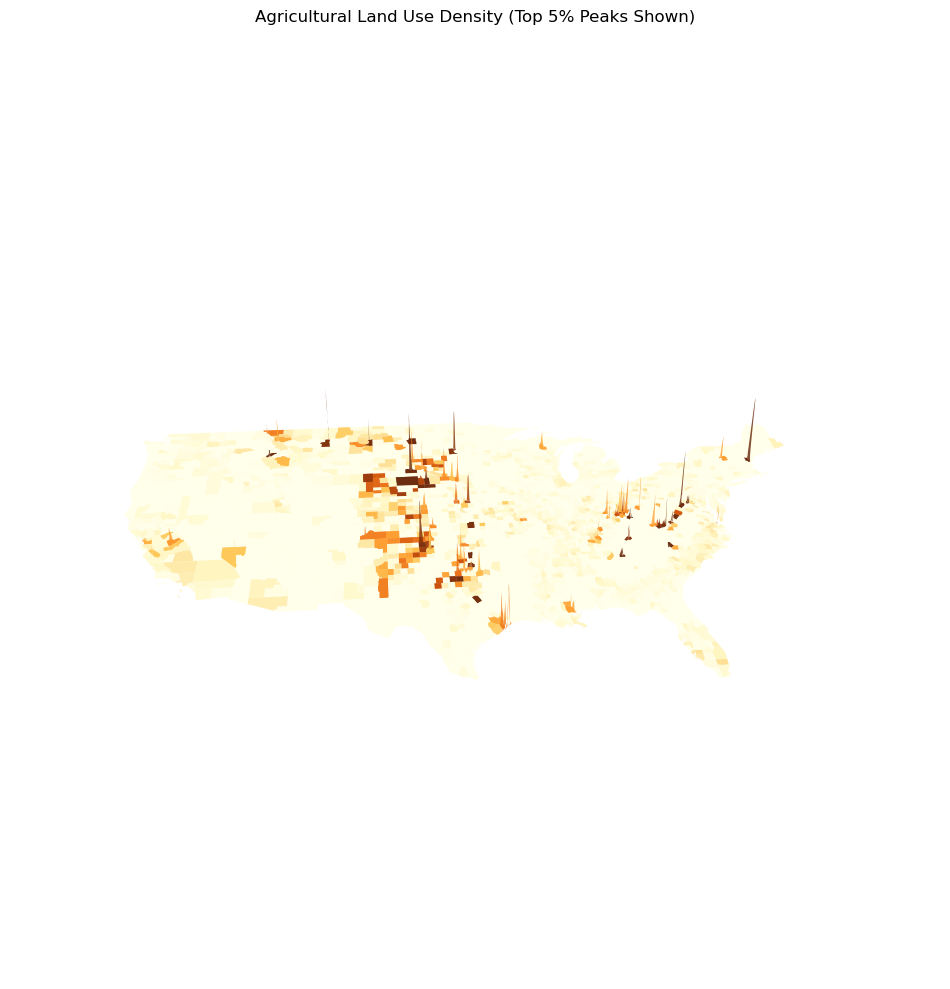

Calculating county densities for Others type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

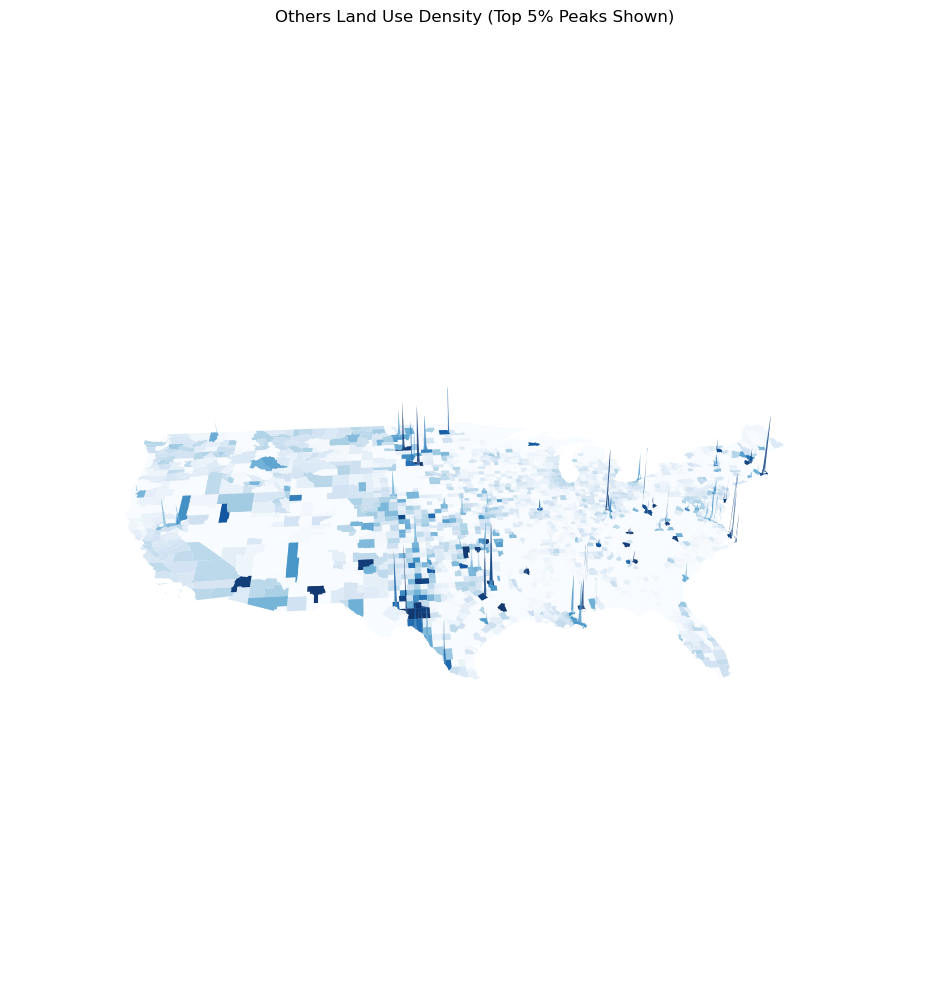

In [ ]:
import geopandas as gpd
from function import * 
from shapely.geometry import box, Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from function import PATHS
from rtree import index
from tqdm.auto import tqdm

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 25,
    'lat_max': 49
}
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

# 读取county数据并裁剪到bbox范围
us_county = gpd.read_file(PATHS['us_county'])
us_county = us_county.to_crs(epsg=4326).clip(bbox)  # 确保使用WGS84坐标系并裁剪

# 读取密度数据
df = pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Combine land use types
df['weighted_density_type1'] = df['weighted_density_2'] + df['weighted_density_6']  # Ecological
df['weighted_density_type2'] = df['weighted_density_1'] + df['weighted_density_5'] + df['weighted_density_7']  # Agricultural
df['weighted_density_type3'] = df['weighted_density_3'] + df['weighted_density_4'] + df['weighted_density_8'] + df['weighted_density_9']  # Others

# df = pd.read_csv('data/US_data/df_weight.csv')


# 过滤bound范围内的点
df = df[(df['lon'] >= usa_bounds_main['lon_min']) & 
        (df['lon'] <= usa_bounds_main['lon_max']) & 
        (df['lat'] >= usa_bounds_main['lat_min']) & 
        (df['lat'] <= usa_bounds_main['lat_max'])].reset_index(drop=True)

# 创建空间索引
print("Creating spatial index...")
spatial_index = index.Index()
for i, point in enumerate(zip(df['lon'], df['lat'])):
    spatial_index.insert(i, (point[0], point[1], point[0], point[1]))

type_names = ['Ecological', 'Agricultural', 'Others']
# Define color schemes for each type
color_schemes = [plt.cm.Greens, plt.cm.YlOrBr, plt.cm.Blues]

for idx in range(3):
    print(f"Calculating county densities for {type_names[idx]} type...")
    us_county[f'mean_density_type{idx+1}'] = 0.0  # Initialize density column
    
    for county_idx, county in tqdm(us_county.iterrows(), total=len(us_county)):
        bounds = county.geometry.bounds
        possible_points = list(spatial_index.intersection(bounds))
        
        points_in_county = []
        for point_idx in possible_points:
            point = Point(df.iloc[point_idx]['lon'], df.iloc[point_idx]['lat'])
            if county.geometry.contains(point):
                points_in_county.append(df.iloc[point_idx][f'weighted_density_type{idx+1}'])
        
        mean_density = np.mean(points_in_county) if points_in_county else 0
        us_county.at[county_idx, f'mean_density_type{idx+1}'] = mean_density

    # Create new figure for each type
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111, projection='3d')

    # 设置显示山峰的百分比阈值（1%）
    percentile = 5
    density_threshold = np.percentile(us_county[f'mean_density_type{idx+1}'].values, 100 - percentile)
    height_scale = 0.15
    sigma = 0.05  # 控制山峰的宽度，值越小山峰越陡峭

    # 绘制每个county的3D表示
    for _, county in tqdm(us_county.iterrows(), total=len(us_county)):
        county_boundary = county.geometry
        mean_density = county[f'mean_density_type{idx+1}']
        
        if mean_density >= 0:  # 只绘制有数据的county
            if county_boundary.geom_type == 'Polygon':
                x, y = county_boundary.exterior.xy
                x = np.array(x)
                y = np.array(y)
                
                # 创建底部平面
                verts_bottom = [list(zip(x, y, [0]*len(x)))]
                poly_bottom = Poly3DCollection(verts_bottom, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                ax.add_collection3d(poly_bottom)
                
                if mean_density > density_threshold:
                    # 创建山峰效果
                    center_x, center_y = np.mean(x), np.mean(y)
                    z = np.zeros_like(x)
                    for i in range(len(x)):
                        dist = np.sqrt((x[i] - center_x)**2 + (y[i] - center_y)**2)
                        z[i] = mean_density * 1 * np.exp(-(dist**2)/(2*sigma**2))
                    
                    # 创建顶部山峰
                    verts_top = [list(zip(x, y, z))]
                    poly_top = Poly3DCollection(verts_top, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                    ax.add_collection3d(poly_top)
                    
            elif county_boundary.geom_type == 'MultiPolygon':
                for polygon in county_boundary.geoms:
                    x, y = polygon.exterior.xy
                    x = np.array(x)
                    y = np.array(y)
                    
                    # 创建底部平面
                    verts_bottom = [list(zip(x, y, [0]*len(x)))]
                    poly_bottom = Poly3DCollection(verts_bottom, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                    ax.add_collection3d(poly_bottom)
                    
                    if mean_density > density_threshold:
                        # 创建山峰效果
                        center_x, center_y = np.mean(x), np.mean(y)
                        z = np.zeros_like(x)
                        for i in range(len(x)):
                            dist = np.sqrt((x[i] - center_x)**2 + (y[i] - center_y)**2)
                            z[i] = mean_density * 1 * np.exp(-(dist**2)/(2*sigma**2))
                        
                        # 创建顶部山峰
                        verts_top = [list(zip(x, y, z))]
                        poly_top = Poly3DCollection(verts_top, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                        ax.add_collection3d(poly_top)

    # 设置视角
    ax.set_proj_type('persp', focal_length=0.25)
    ax.view_init(elev=30, azim=-95)

    # 设置坐标轴范围
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])
    ax.set_zlim(0, 1)  # 设置z轴范围，这样高度缩放就会生效

    # 设置坐标轴比例
    ax.set_box_aspect([1.5, 1, height_scale])  # 设置x:y:z的比例为2:1:0.5

    # 设置标题
    ax.set_title(f'{type_names[idx]} Land Use Density (Top {percentile}% Peaks Shown)', pad=20)

    # 隐藏坐标轴
    ax.set_axis_off()

    # 调整布局并显示
    plt.tight_layout()
    plt.show()

In [2]:
df

,lat,lon,time,acc_forest,cap_forest,final_forest,weighted_density_Forest,weighted_density_Agricultural,weighted_density_Vegetation,acc_agro,...,env_scores,Revenue_ratio,gmm_score,gmm_density,predicted_label,predicted_prob,sample_type,LNCS_expect,Expectation_net_benefit,pv_potential_dens
0,25.295834,-80.287500,2020-01-01,809.56850,859.4,809.5685,0.998714,0.000367,0.000918,772.493469,...,0.272397,8.883647,0.051633,3.874315e+16,0,0.000000,negative_sample,809.562299,4758.781908,5568.344207
1,25.437500,-80.537500,2020-01-01,1389.71330,1436.6,1389.7133,0.829869,0.007830,0.162302,1102.152466,...,0.279062,5.231752,0.107510,2.054387e+18,0,0.046746,prediction,1344.744161,4102.430766,5447.174926
2,25.437500,-80.495834,2020-01-01,1026.14620,1072.6,1026.1462,0.771417,0.022229,0.206354,750.145691,...,0.272678,7.250159,0.033807,4.247702e+15,0,0.000000,negative_sample,968.823440,4469.645652,5438.469092
3,25.445833,-80.454170,2020-01-01,1026.14620,1073.7,1026.1462,0.770923,0.007369,0.221708,756.315613,...,0.309372,7.242180,0.010552,1.117299e+13,0,0.000000,negative_sample,968.995616,4464.453759,5433.449375
4,25.445833,-80.404170,2020-01-01,1051.13070,1093.3,1051.1307,0.714253,0.099801,0.185946,728.004333,...,0.307317,7.304962,0.081528,4.463459e+17,0,0.017465,prediction,964.480123,4490.532039,5455.012162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,48.995834,-111.970830,2020-01-01,201.90521,182.2,182.2000,0.952007,0.017433,0.030560,170.484009,...,0.251081,35.172626,0.066566,1.493778e+17,0,0.026153,prediction,181.751426,4767.814366,4949.565792
64978,48.995834,-110.345830,2020-01-01,221.94190,198.1,198.1000,0.626705,0.332696,0.040599,175.665878,...,0.296190,33.697715,0.080337,4.120084e+17,0,0.068266,prediction,189.800818,4762.226494,4952.027311
64979,48.995834,-106.020836,2020-01-01,232.56694,207.1,207.1000,0.889626,0.003256,0.107118,209.715591,...,0.177785,30.963208,0.076823,3.232082e+17,0,0.065097,prediction,207.085706,4757.472100,4964.557807
64980,48.995834,-104.087500,2020-01-01,249.97507,225.2,225.2000,0.456741,0.057912,0.485347,204.508926,...,0.284555,29.205817,0.377389,6.627032e+21,0,0.109234,prediction,215.466966,4656.838886,4872.305853


## 2.4 HEX Map

### Load data 

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import rioxarray
from shapely.geometry import mapping
from pyproj import Transformer
import numpy as np
import matplotlib.pyplot as plt

# Load US states shapefile
us_states = gpd.read_file('data/cb_2018_us_state_500k.shp')

# Function to clip dataframes using the US states shapefile
def clip_data_with_us_states(df, lon_col='lon', lat_col='lat'):
    """
    Clip a dataframe using US states shapefile
    """
    # Create geometry points from coordinates
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    
    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    
    # Ensure US states has the same CRS
    us_states_4326 = us_states.to_crs('EPSG:4326')
    
    # Perform spatial join to find points within US states
    clipped_gdf = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    
    # Remove geometry columns and keep original data
    clipped_df = clipped_gdf.drop(columns=['geometry', 'index_right'])
    
    # Remove any additional columns from the shapefile that might have been added
    shapefile_columns = us_states.columns.tolist()
    for col in shapefile_columns:
        if col in clipped_df.columns:
            clipped_df = clipped_df.drop(columns=[col])
    
    return clipped_df

# # Clip all your dataframes
# df_economic = clip_data_with_us_states(df_economic)
# df_weight = clip_data_with_us_states(df_weight)
# df_strategies = clip_data_with_us_states(df_strategies)
# df_net_benefit = clip_data_with_us_states(df_net_benefit)
# df_pv_npv = clip_data_with_us_states(df_pv_npv)
# df_agricultural_npv = clip_data_with_us_states(df_agricultural_npv)
# df_afforestation_npv = clip_data_with_us_states(df_afforestation_npv)
# df_natural_npv = clip_data_with_us_states(df_natural_npv)

df_economic = pd.read_csv('data/US_data/df_economic.csv')
df_weight = pd.read_csv('data/US_data/df_weight.csv')
df_strategies = pd.read_csv('data/US_data/df_strategies.csv')
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')
df_pv_npv = pd.read_csv('data/US_data/df_pv_npv.csv')
df_agricultural_npv = pd.read_csv('data/US_data/df_agricultural_npv.csv')
df_afforestation_npv = pd.read_csv('data/US_data/df_afforestation_npv.csv')
df_natural_npv = pd.read_csv('data/US_data/df_natural_npv.csv')
pixel_optimized_data = pd.read_csv(r'data\US_data\df_pixel_optimized_data.csv')


#  DEM data 
us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')
dem = rioxarray.open_rasterio(r'C:\Phd_art\Abandoned_land_pv\Data_all\DEM.nc', masked=True)
dem = dem.rio.write_crs("EPSG:4326")
dem_us = dem.rio.clip(us_nation.geometry.apply(mapping), us_nation.crs, drop=True)


In [1]:
# 整合DEM底图设置 - dem_us保持现状颜色，外围dem数据颜色稍深
import numpy as np
import matplotlib.pyplot as plt
import rioxarray
from shapely.geometry import box
import geopandas as gpd
from pyproj import Transformer
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_ccd_optimized_global_style_with_dem_integrated(pixel_optimized_data, us_states_gdf, dem_us, dem_full):
    """Plot CCD optimized results with integrated DEM background (dem_us + peripheral dem)"""
    import matplotlib.pyplot as plt
    import geopandas as gpd
    import numpy as np
    from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
    from pyproj import Transformer
    from shapely.geometry import box
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    from matplotlib import font_manager
    import matplotlib.patches as mpatches

    # Set default font
    plt.rcParams['font.family'] = 'Arial'

    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    usa_bounds_main = {'lon_min': -125, 'lon_max': -65, 'lat_min': 24, 'lat_max': 51}
    bbox = box(usa_bounds_main['lon_min'], usa_bounds_main['lat_min'],
               usa_bounds_main['lon_max'], usa_bounds_main['lat_max'])
    us_states_bound = us_states_gdf.to_crs(epsg=4326).clip(bbox)
    us_states_albers = us_states_bound.to_crs('ESRI:102003')
    transformer = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    x_proj, y_proj = transformer.transform(pixel_optimized_data['lon'].values, pixel_optimized_data['lat'].values)
    ax.set_facecolor('#f0f8ff')

    # 加载辅助底图
    try:
        helper_gdf = gpd.read_file(r'figure\draw_shp\ne_110m_land.shp')
        extended_bbox = box(usa_bounds_main['lon_min'] - 5, usa_bounds_main['lat_min'] - 3,
                            usa_bounds_main['lon_max'] + 5, usa_bounds_main['lat_max'] + 3)
        helper_gdf_proj = helper_gdf.to_crs(epsg=4326).clip(extended_bbox).to_crs('ESRI:102003')
        helper_gdf_proj.plot(ax=ax, color='white', edgecolor='lightgray', linewidth=0.3, alpha=0.9)
    except Exception as e:
        print(f"Helper map error: {e}")

    # === 整合DEM底图设置 ===
    
    # 1. 处理外围DEM数据（完整DEM，颜色稍深）
    print("处理外围DEM数据...")
    dem_lon_full = dem_full.x.values
    dem_lat_full = dem_full.y.values
    
    # 找到美国范围外的DEM数据
    lon_mask_outside = ~((dem_lon_full >= usa_bounds_main['lon_min']) & (dem_lon_full <= usa_bounds_main['lon_max']))
    lat_mask_outside = ~((dem_lat_full >= usa_bounds_main['lat_min']) & (dem_lat_full <= usa_bounds_main['lat_max']))
    
    # 获取外围数据的索引
    lon_indices_outside = np.where(lon_mask_outside)[0]
    lat_indices_outside = np.where(lat_mask_outside)[0]
    
    if len(lon_indices_outside) > 0 and len(lat_indices_outside) > 0:
        # 降采样外围数据
        step_outside = max(1, min(len(lon_indices_outside), len(lat_indices_outside)) // 100000)
        lon_subset_outside = lon_indices_outside[::step_outside]
        lat_subset_outside = lat_indices_outside[::step_outside]
        
        if len(lon_subset_outside) > 0 and len(lat_subset_outside) > 0:
            elev_subset_outside = dem_full.squeeze().values[np.ix_(lat_subset_outside, lon_subset_outside)]
            valid_mask_outside = ~np.isnan(elev_subset_outside)
            valid_elev_outside = elev_subset_outside[valid_mask_outside]
            
            if valid_elev_outside.size > 0:
                # 外围DEM使用稍深的颜色
                terrain_colors_outside = ListedColormap([
                    "#d4d4d4", "#c0c0c0", "#a8a8a8", "#8f8f8f", 
                    "#767676", "#5d5d5d", "#444444"
                ])
                
                percentiles_outside = np.percentile(valid_elev_outside, [0, 20, 40, 60, 80, 90, 100])
                norm_outside = BoundaryNorm(percentiles_outside, terrain_colors_outside.N)
                
                lon_grid_outside, lat_grid_outside = np.meshgrid(
                    dem_lon_full[lon_subset_outside], dem_lat_full[lat_subset_outside]
                )
                
                # 转换坐标
                dem_x_proj_outside, dem_y_proj_outside = transformer.transform(
                    lon_grid_outside.flatten(), lat_grid_outside.flatten()
                )
                dem_x_proj_outside = dem_x_proj_outside.reshape(lon_grid_outside.shape)
                dem_y_proj_outside = dem_y_proj_outside.reshape(lat_grid_outside.shape)
                
                # 绘制外围DEM（稍深的颜色）
                ax.pcolormesh(dem_x_proj_outside, dem_y_proj_outside, elev_subset_outside, 
                             cmap=terrain_colors_outside, norm=norm_outside,
                             alpha=0.6, zorder=1)

    # 2. 处理美国区域DEM数据（dem_us，保持现状颜色）
    print("处理美国区域DEM数据...")
    dem_lon_us = dem_us.x.values
    dem_lat_us = dem_us.y.values
    lon_mask_us = (dem_lon_us >= usa_bounds_main['lon_min']) & (dem_lon_us <= usa_bounds_main['lon_max'])
    lat_mask_us = (dem_lat_us >= usa_bounds_main['lat_min']) & (dem_lat_us <= usa_bounds_main['lat_max'])
    lon_indices_us = np.where(lon_mask_us)[0]
    lat_indices_us = np.where(lat_mask_us)[0]

    if len(lon_indices_us) > 0 and len(lat_indices_us) > 0:
        step_us = max(1, len(lon_indices_us) // 200000)
        lon_subset_us = lon_indices_us[::step_us]
        lat_subset_us = lat_indices_us[::step_us]
        elev_subset_us = dem_us.squeeze().values[np.ix_(lat_subset_us, lon_subset_us)]
        valid_mask_us = ~np.isnan(elev_subset_us)
        valid_elev_us = elev_subset_us[valid_mask_us]

        if valid_elev_us.size > 0:
            # 美国区域DEM使用现状颜色（较浅）
            terrain_colors_us = ListedColormap([
                "#ffffff", "#ffffff", "#e0f3db", "#a8ddb5",
                "#e6cfa1", "#c9a86b", "#a97c50"
            ])
            
            percentiles_us = np.percentile(valid_elev_us, [30, 45, 60, 70, 80, 90, 100])
            norm_us = BoundaryNorm(percentiles_us, terrain_colors_us.N)
            
            lon_grid_us, lat_grid_us = np.meshgrid(
                dem_lon_us[lon_subset_us], dem_lat_us[lat_subset_us]
            )
            
            # 转换坐标
            dem_x_proj_us, dem_y_proj_us = transformer.transform(
                lon_grid_us.flatten(), lat_grid_us.flatten()
            )
            dem_x_proj_us = dem_x_proj_us.reshape(lon_grid_us.shape)
            dem_y_proj_us = dem_y_proj_us.reshape(lat_grid_us.shape)
            
            # 绘制美国区域DEM（现状颜色）
            ax.pcolormesh(dem_x_proj_us, dem_y_proj_us, elev_subset_us, 
                         cmap=terrain_colors_us, norm=norm_us,
                         alpha=0.5, zorder=2)

    # === 地图边界设置 ===
    xmin, ymin, xmax, ymax = us_states_albers.total_bounds
    mx, my = (xmax - xmin) * 0.08, (ymax - ymin) * 0.08
    ax.set_xlim(xmin - mx, xmax + mx)
    ax.set_ylim(ymin - my, ymax + my)
    us_states_albers.plot(ax=ax, color='none', edgecolor='black', alpha=0.3, zorder=3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
    # === 经纬度网格线 ===
    lon_ticks = np.arange(-120, -60, 10)
    lat_ticks = np.arange(25, 55, 5)
    for i, lon in enumerate(lon_ticks):
        lat_line = np.linspace(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'], 100)
        lon_line = np.full_like(lat_line, lon)
        x_line, y_line = transformer.transform(lon_line, lat_line)
        ax.plot(x_line, y_line, color='gray', linewidth=0.3, alpha=0.5, zorder=4)
        if lon == -70:
            label_lat = usa_bounds_main['lat_min'] + 2.5
        else:
            label_lat = usa_bounds_main['lat_min'] + 0.5
        x_label, y_label = transformer.transform([lon], [label_lat])
        ax.text(x_label[0], y_label[0], f'{lon}°W', ha='center', va='bottom',
                fontsize=8, color='gray', zorder=6, clip_on=True)

    for j, lat in enumerate(lat_ticks):
        lon_line = np.linspace(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'], 100)
        lat_line = np.full_like(lon_line, lat)
        x_line, y_line = transformer.transform(lon_line, lat_line)
        ax.plot(x_line, y_line, color='gray', linewidth=0.3, alpha=0.5, zorder=4)
        if lat == 25:
            label_lon = usa_bounds_main['lon_min'] + 2.5
        else:
            label_lon = usa_bounds_main['lon_min'] + 0.5
        x_label, y_label = transformer.transform([label_lon], [lat])
        ax.text(x_label[0], y_label[0], f'{lat}°N', ha='left', va='center',
                fontsize=8, color='gray', zorder=6, clip_on=True)

    # === CCD散点图 ===
    ccd_values = pixel_optimized_data['ccd_optimized'].values
    diverging_colors = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8',
                        '#ffffbf', '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
    ccd_cmap = LinearSegmentedColormap.from_list("ccd_diverging", diverging_colors, N=11)
    ccd_bins = np.percentile(ccd_values, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ccd_norm = BoundaryNorm(ccd_bins, ncolors=ccd_cmap.N)
    scatter = ax.scatter(x_proj, y_proj, c=ccd_values, cmap=ccd_cmap, norm=ccd_norm,
                         s=2.2, alpha=1.0, edgecolors='none', zorder=5)

    # === 颜色条 ===
    cbar_ax = inset_axes(ax, width="33%", height="4%",
                         loc='lower left',
                         bbox_to_anchor=(0.02, 0.02, 1, 1),
                         bbox_transform=ax.transAxes, borderpad=1)
    cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
    cbar.set_ticks(ccd_bins[::2])
    cbar.set_ticklabels([f'{v:.3f}' for v in ccd_bins[::2]])
    cbar.ax.tick_params(labelsize=10) 
    cbar.outline.set_linewidth(0.7)

    percentile_labels = [f'{p}%' for p in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100][::2]]
    for i, label in enumerate(percentile_labels):
        cbar_ax.text(i / (len(percentile_labels) - 1), 1.25, label,
                     transform=cbar_ax.transAxes, ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

    # === 指北针和比例尺 ===
    def add_nature_north_arrow(ax, size=0.04):
        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
        dx, dy = x1 - x0, y1 - y0
        desired_size = 0.045
        h = desired_size * dy
        w = h * 0.5
        cx = x0 + 0.965 * dx
        cy = y0 + 0.945 * dy
        coords = [[cx, cy + h / 2], [cx - w / 2, cy - h / 2], [cx + w / 2, cy - h / 2]]
        ax.add_patch(mpatches.Polygon(coords, closed=True, facecolor="white", edgecolor="black", lw=1.2, zorder=10))
        ax.add_patch(mpatches.Polygon([[cx, cy + h / 2], [cx, cy - h / 2], [cx + w / 2, cy - h / 2]],
                                      closed=True, facecolor="black", edgecolor="black", lw=1.2, zorder=11))
        ax.text(cx, cy - h * 1.0, 'N', ha='center', va='center',
                fontsize=15, fontweight='bold', color='black', zorder=12)

    def add_nature_scalebar(ax, length_km=500):
        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
        dx, dy = x1 - x0, y1 - y0
        bar_x = x0 + 0.80*dx
        bar_y = y0 + 0.03*dy
        bar_height = 0.01*dy
        bar_length = length_km * 1000
        n_segments = 4
        seg_len = bar_length / n_segments
        for i in range(n_segments):
            color = "black" if i % 2 == 0 else "white"
            ax.add_patch(mpatches.Rectangle((bar_x + i*seg_len, bar_y),
                                            seg_len, bar_height,
                                            facecolor=color, edgecolor="black", lw=0.8))
        ax.text(bar_x + bar_length/2, bar_y - 0.008*dy,
                f"{length_km} km", ha="center", va="top",
                fontsize=10, fontweight="bold", color="black")

    add_nature_north_arrow(ax, size=0.08)
    add_nature_scalebar(ax, length_km=1000)

    plt.tight_layout()
    plt.show()
    return fig, ax

# 使用整合后的函数
fig_geo, ax = plot_ccd_optimized_global_style_with_dem_integrated(pixel_optimized_data, us_states_4326, dem_us, dem)
# fig_geo.savefig("figure/US_figure/ccd_optimized_global_style_with_dem_integrated_300dpi.png", dpi=300, bbox_inches='tight')

NameError: name 'pixel_optimized_data' is not defined

### 2.4.2低密度 HEX测试

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data points: 70,312
  Medium sparsity (57.4% empty hexes), moderately increasing hex size
  Good hex density (31.8 points/hex), keeping size
  Reasonably uniform distribution (CV=1.61)
Grid optimization summary:
  Geographic area: 1620.0 sq degrees (ratio: 2.22)
  Data density: 43.4 points/sq degree
  Data count: 70,312 points
  Sparsity ratio: 57.4%
  Avg points/hex: 31.8
  Distribution CV: 1.61
  Gridsize range: [12, 100]
  Final gridsize: 100
Final gridsize: 100


c:\PhDart\cropland_co\Landuse_Zhong-1\function\haxgrid.py:333: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


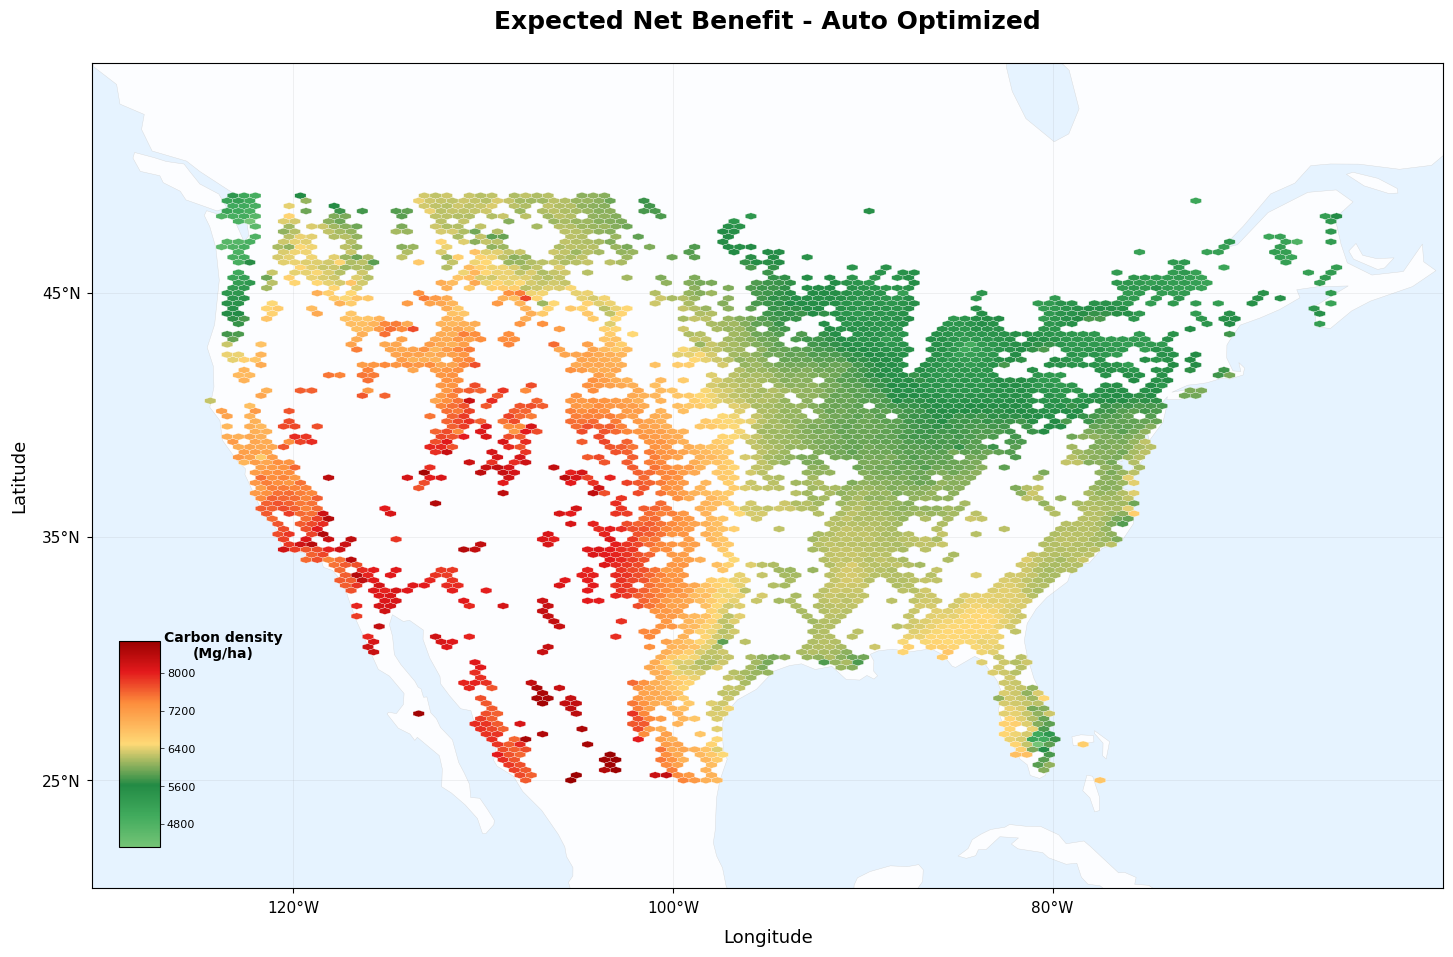

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from function import *
from function import PATHS
from shapely.geometry import Polygon, Point, box
from tqdm.auto import tqdm
import glob

%load_ext autoreload
%autoreload 2

df_strategies=pd.read_csv('data/4.df_strategies.csv')
helper_shapefile=r'figure\draw_shp\ne_110m_land.shp'


fig1 = create_adaptive_hexmap(
    df_strategies,
    variable='Expectation_net_benefit',
    title='Expected Net Benefit - Auto Optimized',
    auto_gridsize=True,  # 自动计算最优大小
    helper_shp=helper_shapefile
)


# fig, hull_data = create_hexmap_with_convex_hulls(
#     df_strategies, variable='Expectation_net_benefit',
#     helper_shp=helper_shapefile,
#     show_convex_hulls=True,
#     hull_style='both',          # 'line', 'fill', 或 'both'
#     n_clusters=6,               
#     min_cluster_size=200,       
#     buffer_ratio=0.05           
# )

# 2.5 Latitude Line Map

gogogo


c:\PhDart\cropland_co\Landuse_Zhong-1\function\lat_aggrline.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_cols)[variable]


Number of latitude intervals after aggregation: 240
Average data points per interval: 292.9


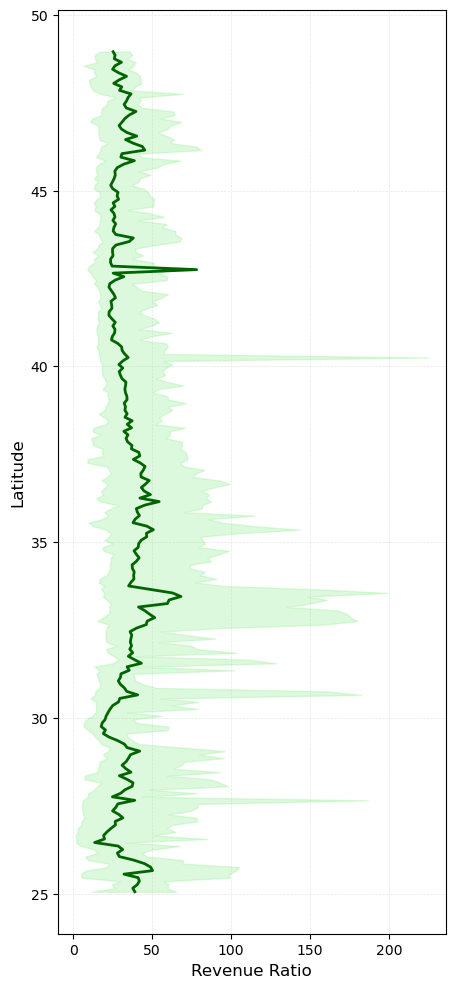

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from function.lat_aggrline import plot_revenue_ratio_by_latitude
import glob

%load_ext autoreload
%autoreload 2

df_strategies=pd.read_csv('data/4.df_strategies.csv')

fig2 =plot_revenue_ratio_by_latitude(
    df_strategies,
    variable='Revenue_ratio',
    lat_col='lat',
    lat_bin_size=0.1,  
    figsize=(5,12),
    save_path="figure/revenue_ratio_by_latitude_final.png"
)


# 2.6 Cloud Rain Map

gogogo
Original data points: 70,312
  Medium sparsity detected (50.1% empty hexes), moderately increasing hex size
  Good hex density (52.2 points/hex), keeping size
Grid optimization summary:
  Geographic area: 1620.0 sq degrees
  Data density: 43.4 points/sq degree
  Data count: 70,312 points
  Sparsity ratio: 50.1%
  Avg points/hex: 52.2
  Final gridsize: 80
Aggregated data points: 1,259
Aggregation ratio: 0.018


c:\PhDart\cropland_co\Landuse_Zhong-1\function\Cloudrain.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


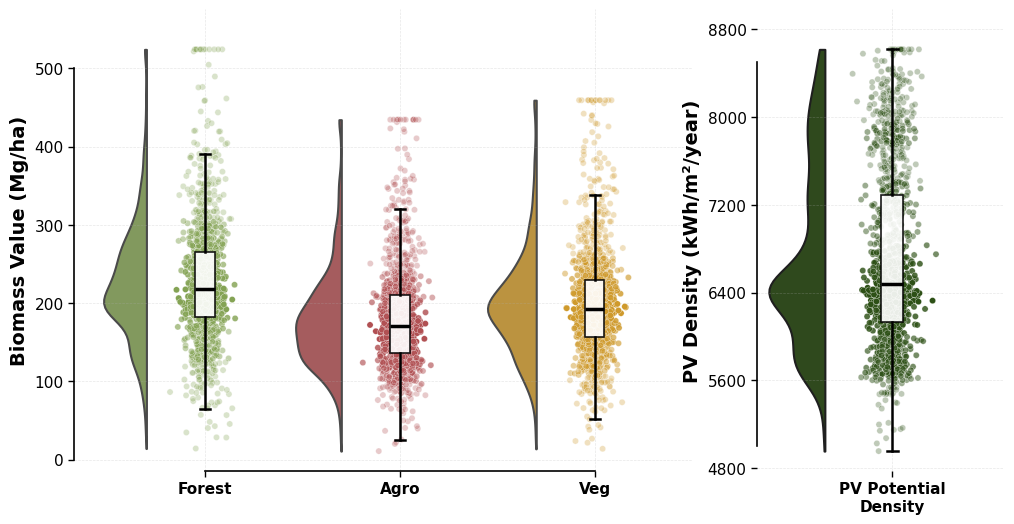

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from scipy.stats import ttest_ind
from scipy.stats import binned_statistic_2d
import sys
sys.path.append('function')
from function import aggregate_data_like_hexmap,plot_cloudrain_distribution
import glob

%load_ext autoreload
%autoreload 2


# 1. 读取数据
df_strategies = pd.read_csv('data/4.df_strategies.csv')
# 调用函数
vars_primary = ["final_forest", "final_agro", "final_veg"]
var_secondary = "pv_potential_dens"
all_vars = vars_primary + [var_secondary]
# 使用蜂窝聚合方法
bounds = (-125, -65, 24, 51)  # 与蜂窝图相同的边界
aggregated_data = aggregate_data_like_hexmap(df_strategies, all_vars, bounds)

fig = plot_cloudrain_distribution(aggregated_data, vars_primary, var_secondary)


# 2.7 Decision map

,lat,lon,time,acc_forest,cap_forest,final_forest,weighted_density_Forest,weighted_density_Agricultural,weighted_density_Vegetation,acc_agro,cap_agro,final_agro,acc_veg,cap_veg,final_veg,env_scores,pv_potential_dens,Expectation_net_benefit,Revenue_ratio
0,25.004168,-107.545830,2020-01-01,202.64836,192.5,192.5,0.915529,0.000000,0.084471,141.051453,151.0,141.051453,148.67093,190.0,148.67093,0.305240,7781.567765,7592.770050,41.216430
1,25.004168,-99.720830,2020-01-01,255.71393,252.4,252.4,0.935189,0.003916,0.060895,205.889297,218.0,205.889297,241.11067,250.0,241.11067,0.289314,7666.688329,7415.157940,30.480167
2,25.004168,-99.712500,2020-01-01,255.74387,249.2,249.2,0.937221,0.003671,0.059108,205.889297,218.0,205.889297,239.50970,247.0,239.50970,0.282092,7702.433915,7453.965684,30.999673
3,25.004168,-77.387500,2020-01-01,715.28530,688.8,688.8,0.239518,0.000000,0.760482,577.347839,617.0,577.347839,605.91394,684.0,605.91394,0.267188,7261.162752,6635.396141,11.603628
4,25.012500,-107.612500,2020-01-01,201.17284,200.1,200.1,0.952143,0.006674,0.041183,140.078674,149.0,140.078674,149.22205,197.0,149.22205,0.264706,7722.962748,7525.358653,39.083010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70307,48.995834,-111.970830,2020-01-01,201.90521,182.2,182.2,0.952007,0.017433,0.030560,170.484009,179.0,170.484009,174.20488,182.0,174.20488,0.251081,6392.674772,6210.923349,35.172626
70308,48.995834,-110.345830,2020-01-01,221.94190,198.1,198.1,0.626705,0.332696,0.040599,175.665878,197.0,175.665878,177.52232,198.0,177.52232,0.296190,6395.853979,6206.053157,33.697715
70309,48.995834,-106.020836,2020-01-01,232.56694,207.1,207.1,0.889626,0.003256,0.107118,209.715591,206.0,206.000000,211.58206,207.0,207.00000,0.177785,6412.037900,6204.952188,30.963208
70310,48.995834,-104.087500,2020-01-01,249.97507,225.2,225.2,0.456741,0.057912,0.485347,204.508926,222.0,204.508926,207.61511,225.0,207.61511,0.284555,6292.888713,6077.421747,29.205817


我想要呈现什么信息：

利用撂荒地建设光伏来促进气候行动具有可行性

Fig.1 利用撂荒地进行光伏建设的政策优先级分区

整合三类可行性进行优先级分区（根据统计特征进行分位数的排序）其次展示三张统计类图片，展示两两变量之间的相关关系（图中数据包括：数据点密度热图、不同区域或者国家的分区回归线、总体回归与相关关系）

Extend figure: Spatial distribution of PV sites from 2015-2020

图表声明Fig.2 ： Policy feasibility

表达信息：光伏策略干预下的净碳期望，传统策略的碳期望及其联合概率分布，以及两者之间关系

1a、Net Carbon Accumulation Potential with existence of PV strategies
2b、The difference between Potential and Current Carbon density 
3c、Expected Emission Abatement Across Afforestation, Agricultural Use and Vegetation Regeneration
4d、Joint Probability Density Heatmap of Carbon Abatement Strategies

图表声明Fig.3 ：Economical Feasibility

表达信息：随着时间变化，传统策略中期望NPV是怎么随着时间变化累积


To delineate feasible trajectories of future PV and 


我能提供的数据：

AR6情境下

在Extend Fig中展示单维度的可行性空间分布（三张全球地图）

Fig.2 利用撂荒地进行光伏建设的净减排收益


Fig.3 

随着2020-2050光伏NPV累积曲线，传统策略期望的NPV累积曲线


In [ ]:
后续计划：

数据来源规范、第一部分模型升级